In [72]:
## by Karina Laneri March 2022 ##
## karinalaneri@gmail.com ##

import numpy as np
import glob
import geopy
from geopy import distance
import matplotlib
import matplotlib.pyplot as plt
import haversine as hs
from scipy import interpolate
from scipy.spatial import ConvexHull
from haversine import Unit
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


In [98]:
folder = "/home/karina/TORTUGAS/PAPERtrayectorias/CONVEXHULL/ConvexHullNUEVASfiltradas05kmh"
filenames2020 = folder+"/*2020.txt.filtered"
filenames2021 = folder+"/*2021.txt.filtered"
files = glob.glob(filenames2020)
files2021 = glob.glob(filenames2021)
data2020 = []
data2021 = []
for i in files:
    data2020.append(np.loadtxt(i, unpack=True, usecols=(0, 1), skiprows=1))
for j in files2021:
    data2021.append(np.loadtxt(j, unpack=True, usecols=(0, 1), skiprows=1))


In [52]:
# calculates min value of a list of lists
def get_min_value(self, listoflist):
    mins_lat = []
    mins_lon = []
    for i in range(0, len(listoflist)):
        min_lat = min(listoflist[i][0])
        min_lon = min(listoflist[i][1])
        mins_lat.append(min_lat)
        mins_lon.append(min_lon)
    minminlat = min(mins_lat)
    minminlon = min(mins_lon)

    return (minminlat, minminlon)


In [53]:
# This will be the origin for all the coordinates
Oesteorigenxcoord = get_min_value(0, data2020)[1]
Surorigenycoord = get_min_value(0, data2020)[0]
PointOriginSWlonglat = (Oesteorigenxcoord, Surorigenycoord)
print(PointOriginSWlonglat)


(-65.00215, -40.5865)


In [54]:
# creates a vector with the origincoords values but with size sizevector
def extendvec(coordorigin, sizevector):
    vecextended = np.repeat(np.array(coordorigin), sizevector)
    return vecextended


In [100]:
# Datos 2020 create vector of origin with same size as data
vecorigenlong2020 = []
vecorigenlat2020 = []
for i in range(0, len(data2020)):
    vecorigenlong2020.append(extendvec(Oesteorigenxcoord, data2020[i][1].size))
    vecorigenlat2020.append(extendvec(Surorigenycoord, data2020[i][0].size))

# Datos 2021 create vector of origin with same size as data
vecorigenlong2021 = []
vecorigenlat2021 = []
for i in range(0, len(data2021)):
    vecorigenlong2021.append(extendvec(Oesteorigenxcoord, data2021[i][1].size))
    vecorigenlat2021.append(extendvec(Surorigenycoord, data2021[i][0].size))



In [101]:
# Data 2020
yallpoints2020 = np.array([vecorigenlong2020[0], data2020[0][0]])
print(yallpoints2020[0][2], yallpoints2020[1][2])

# Data 2021
yallpoints2021 = np.array([vecorigenlong2021[0], data2021[0][0]])
print(yallpoints2021[0][2], yallpoints2021[1][2])



-65.00215 -40.583035
-65.00215 -40.583492


In [63]:
distancias2020 = []

for i in range(0, len(data2020)):
    yallpoints2020 = np.array([vecorigenlong2020[i], data2020[i][0]])
    xallpoints2020 = np.array([data2020[i][1], vecorigenlat2020[i]])
    xdist2020meters = np.zeros(xallpoints2020[1].size)
    ydist2020meters = np.zeros(yallpoints2020[1].size)
    # print(xallpoints2020[i])

    for j in range(0, len(xdist2020meters)):
        pointx2020 = (xallpoints2020[0][j], xallpoints2020[1][j])
        pointy2020 = (yallpoints2020[0][j], yallpoints2020[1][j])
        xdist2020meters[j] = distance.distance(
            pointx2020, PointOriginSWlonglat).m
        ydist2020meters[j] = distance.distance(
            pointy2020, PointOriginSWlonglat).m
    distancias2020.append([xdist2020meters, ydist2020meters])


In [102]:
distancias2021 = []

for i in range(0, len(data2021)):
    yallpoints2021 = np.array([vecorigenlong2021[i], data2021[i][0]])
    xallpoints2021 = np.array([data2021[i][1], vecorigenlat2021[i]])
    xdist2021meters = np.zeros(xallpoints2021[1].size)
    ydist2021meters = np.zeros(yallpoints2021[1].size)
    

    for j in range(0, len(xdist2021meters)):
        pointx2021 = (xallpoints2021[0][j], xallpoints2021[1][j])
        pointy2021 = (yallpoints2021[0][j], yallpoints2021[1][j])
        xdist2021meters[j] = distance.distance(pointx2021, PointOriginSWlonglat).m
        ydist2021meters[j] = distance.distance(pointy2021, PointOriginSWlonglat).m
    distancias2021.append([xdist2021meters, ydist2021meters])


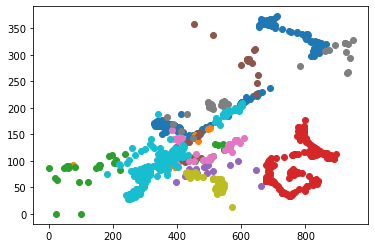

In [59]:
for i in range(0, len(distancias2020)):
    plt.plot(distancias2020[i][0], distancias2020[i][1], 'o')
plt.show()


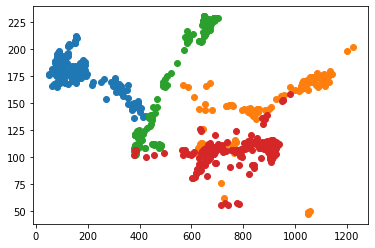

In [103]:
for i in range(0, len(distancias2021)):
    plt.plot(distancias2021[i][0], distancias2021[i][1], 'o')
plt.show()


In [60]:
# convex hull calculation 2020
hulls2020 = []
areas2020 = np.zeros(len(data2020))
for i in range(0, len(data2020)):
    points2020 = np.stack(
        (distancias2020[i][0], distancias2020[i][1]), axis=-1)
    hull = ConvexHull(points2020)
    areas2020[i] = hull.area
    hulls2020.append(hull)
print(areas2020)


[1224.99818454  887.40190216 1222.06132716  545.34738839  643.43731178
  887.87027109  564.80109597 1245.67255337  474.99598852  939.61253058]


In [61]:
meanareas2020=areas2020.mean()
stdareas2020=areas2020.std()
print(meanareas2020)
print(stdareas2020)


863.6198553567581
283.2077472868963


In [121]:
# convex hull calculation 2021
hulls2021 = []
areas2021 = np.zeros(len(data2021))
for i in range(0, len(data2021)):
    points2021 = np.stack((distancias2021[i][0], distancias2021[i][1]), axis=-1)
    onehull2021 = ConvexHull(points2021)
    areas2021[i] = onehull2021.area
    hulls2021.append(onehull2021)
print(areas2021)


[ 770.65270654 1410.29036096  714.69009437 1240.9611481 ]


In [122]:
meanareas2021=areas2021.mean()
stdareas2021=areas2021.std()
print(meanareas2021)
print(stdareas2021)

1034.148577494415
298.21882782414104


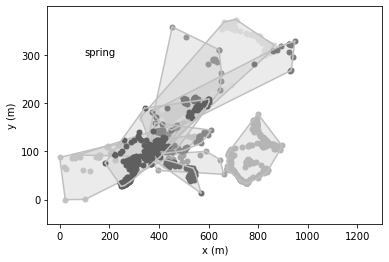

In [140]:
# Hull 2020
fig, ax = plt.subplots()
offset=5
vmin=np.array(-offset)
vmax=np.array(len(data2020)+offset)
norm=matplotlib.colors.Normalize(vmin=vmin,vmax=vmax)
cmap=cm.get_cmap("Greys")


for i in range(0, len(data2020)):
    rgb=cmap(norm(i))
    #color=matplotlib.colors.rgb2hex(rgb)
    plt.plot(distancias2020[i][0], distancias2020[i][1], 'o',color=rgb, markersize=5)
    for simplex in hulls2020[i].simplices:
        plt.plot(distancias2020[i][0][simplex],
                 distancias2020[i][1][simplex], '-', color="silver")
    plt.fill(distancias2020[i][0][hulls2020[i].vertices],
             distancias2020[i][1][hulls2020[i].vertices], 'silver', alpha=0.3)

ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
plt.xlim((-50, 1300))
plt.ylim((-50, 400))
plt.xticks(np.arange(0, 1300, 200))
plt.yticks(np.arange(0, 400, 100))

ax.annotate('spring', (100, 300))

# salva el archivo a un formato png (dpi es la calidad)
plt.savefig('CHullIndividualsTortoises05kmfilter2020_SPRING.png', dpi=520)

plt.show()


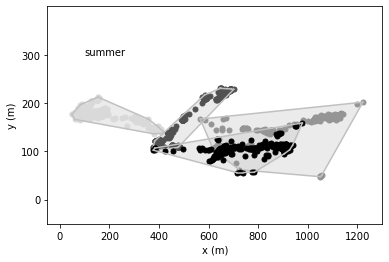

In [141]:
# Hull 2021
fig, ax = plt.subplots()
offset=-1
vmin=np.array(offset)
vmax=np.array(len(data2021)+offset)
norm=matplotlib.colors.Normalize(vmin=vmin,vmax=vmax)
cmap=cm.get_cmap("Greys")


for i in range(0, len(data2021)):
    rgb=cmap(norm(i))
    #color=matplotlib.colors.rgb2hex(rgb)
    plt.plot(distancias2021[i][0], distancias2021[i][1], 'o',color=rgb, markersize=5)
    for simplex in hulls2021[i].simplices:
        plt.plot(distancias2021[i][0][simplex],
                 distancias2021[i][1][simplex], '-', color="silver")
    plt.fill(distancias2021[i][0][hulls2021[i].vertices],
             distancias2021[i][1][hulls2021[i].vertices], 'silver', alpha=0.3)

ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
plt.xlim((-50, 1300))
plt.ylim((-50, 400))
plt.xticks(np.arange(0, 1300, 200))
plt.yticks(np.arange(0, 400, 100))

ax.annotate('summer', (100, 300))

# salva el archivo a un formato png (dpi es la calidad)
plt.savefig('CHullIndividualsTortoises05kmfilter2021_SUMMER.png', dpi=520)

plt.show()
